# EDA Industrial

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime, timedelta

import seaborn as sns
sns.set_context('talk')
%matplotlib inline

In [6]:
sns.set_context("notebook", rc={"grid.linewidth": 0.6, "lines.linewidth": 1})
sns.set_style("whitegrid")
sns.set_palette("Accent_r")

In [7]:
ind_df = pd.read_csv(
    'file1604544922865.csv')
dic_df = pd.read_csv(
    'Descripción de columnas.csv')
ind_df.shape

InvalidURL: ignored

In [8]:
ind_df.dtypes

Current_A                    float64
Current_B                    float64
Current_C                    float64
Current_N                    float64
Current_G                      int64
                              ...   
Reactive_Energy_del_m_rec    float64
Apparent_Energy_Delivered    float64
Apparent_Energy_Received     float64
Apparent_Energy_del_p_rec      int64
createdAt                     object
Length: 62, dtype: object

In [9]:
pd.set_option('display.max_rows', dic_df.shape[0]+1)
dic_df[:62]

NameError: ignored

In [10]:
# Vistazo random a los datos

rd=ind_df.sample(10,random_state=123)
print(rd)

      Current_A  Current_B  Current_C  Current_N  Current_G  Current_Avg  \
5541      14.27       2.15       4.70      10.07         13            2   
2295     113.31     100.33     104.66      16.18         13            2   
3159      97.42      86.07      78.86      27.41         13            2   
6479      10.44       2.60       4.40       6.45         13            2   
2156      31.87      16.07      14.95      21.58         13            2   
4005     122.85     107.68     102.67      27.81         13            2   
4808       7.02       2.16       2.35       5.20         13            2   
765       11.35       2.20       7.47       6.90         13            2   
2464     129.46     116.18     124.27      20.57         13            2   
6711       9.23       2.27       4.38       5.90         13            2   

      Current_UNB_A  Current_UNB_B  Current_UNB_C  Voltage_A_B  ...  \
5541              1              2              5          380  ...   
2295              1  

In [11]:
ind_df["createdAt"].describe()

count                         7119
unique                        7119
top       2020-11-04T00:00:10.274Z
freq                             1
Name: createdAt, dtype: object

In [12]:
# Convertimos la variable a una fecha/hora
ind_df["createdAt"] = pd.to_datetime(ind_df.createdAt)

# Ordenamos el dataframe por fecha/hora
ind_df = ind_df.sort_values("createdAt")

In [13]:
ind_df["createdAt"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                                 7119
unique                                7119
top       2020-11-03 20:54:49.810000+00:00
freq                                     1
first     2020-11-03 20:54:49.810000+00:00
last      2020-11-04 23:54:42.908000+00:00
Name: createdAt, dtype: object

### Detección las variables con valor cero del dataset

In [14]:
cols = ind_df[ind_df == 0].count(axis=0)
cols[cols > 0]

rsrv1                    7119
Voltage_UNB_L_N_Worst    7119
Current_UNB_Worst        7119
Reactive_Power_Total       24
rsrv2                    7119
rsrv3                    7119
rsrv4                    7119
Energy_Acum_Datetime     7119
dtype: int64

> En principio no son variables de interés.

### Detección de variables con valores faltantes

In [15]:
missing_values_count = ind_df.isna().sum()
missing_values_count

Current_A                    0
Current_B                    0
Current_C                    0
Current_N                    0
Current_G                    0
                            ..
Reactive_Energy_del_m_rec    0
Apparent_Energy_Delivered    0
Apparent_Energy_Received     0
Apparent_Energy_del_p_rec    0
createdAt                    0
Length: 62, dtype: int64

> No hay valores nulos! Hmmm...

# Análisis de variables básicas en muestra de 24hs

In [16]:
# Preparamos los datos separados por franjas horarias para análisis posteriores
index = pd.DatetimeIndex(ind_df["createdAt"])

pico  = ind_df.iloc[index.indexer_between_time('18:00', '23:00')].copy()
valle = ind_df.iloc[index.indexer_between_time('23:00', '05:00')].copy()
resto = ind_df.iloc[index.indexer_between_time('05:00', '18:00')].copy()

In [17]:
# función para formatear las etiquetas del eje X
def format_datetime_axis_ticks(axis):
    axis.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axis.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    axis.tick_params(axis='x', labelrotation=45)

## Corriente (Amp)

In [18]:
ind_df[['Current_A','Current_B','Current_C','Current_N','Current_G']].describe()

,Current_A,Current_B,Current_C,Current_N,Current_G
count,7119.000000,7119.000000,7119.000000,7119.000000,7119.0
mean,42.347331,31.327915,31.392374,13.458720,13.0
std,52.090659,47.568211,44.451956,10.603346,0.0
min,4.890000,2.120000,1.210000,2.080000,13.0
25%,9.310000,2.210000,4.370000,5.690000,13.0
50%,12.300000,2.260000,5.240000,8.540000,13.0
75%,93.700000,79.520000,75.490000,21.655000,13.0
max,220.980000,182.290000,178.740000,54.810000,13.0


> La variable **Current_G** parece no estar siendo medida.

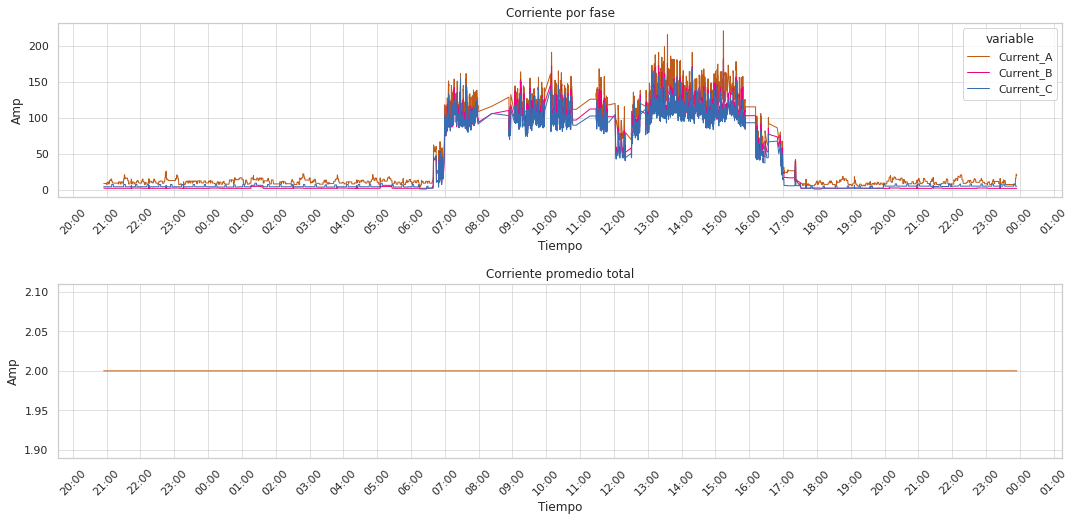

In [19]:
fig, axes = plt.subplots(figsize=(18, 8), nrows=2)
data_preproc = ind_df[['createdAt','Current_A','Current_B','Current_C']]
sns.lineplot(x='createdAt', y='value', hue='variable', data=pd.melt(data_preproc, ['createdAt']), ax=axes[0])

axes[0].set_title("Corriente por fase")
axes[0].set_xlabel("Tiempo")
axes[0].set_ylabel("Amp")
format_datetime_axis_ticks(axes[0])

sns.lineplot(x=ind_df.createdAt, y=ind_df.Current_Avg, ax=axes[1])

axes[1].set_title("Corriente promedio total")
axes[1].set_xlabel("Tiempo")
axes[1].set_ylabel("Amp")
format_datetime_axis_ticks(axes[1])

plt.subplots_adjust(hspace = 0.5)

> Llaman la atención los valles en las curvas de corriente por fase.  
> ¿Por algún motivo el promedio es 2 a lo largo del todo el día?

## Voltaje (Volts)

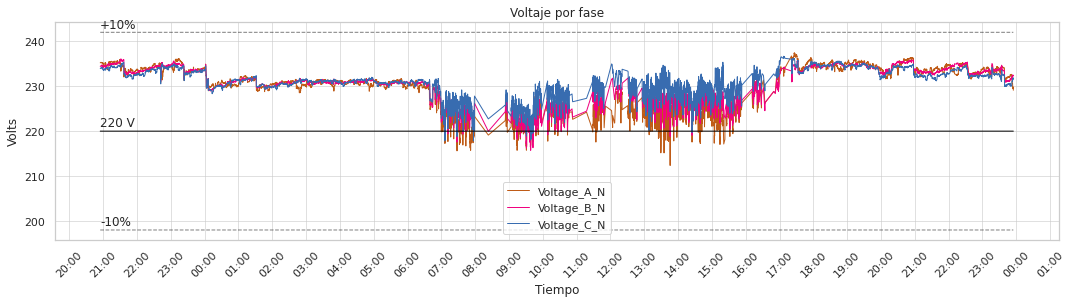

In [20]:
fig, ax = plt.subplots(figsize=(18, 4))
data_preproc = ind_df[['createdAt','Voltage_A_N','Voltage_B_N','Voltage_C_N']]
sns.lineplot(x='createdAt', y='value', hue='variable', data=pd.melt(data_preproc, ['createdAt']))


sns.lineplot(x=ind_df.createdAt, y=242, linestyle='dashed',linewidth=1,color='black', alpha=0.5)
ax.text(ind_df.createdAt.min(), 243, '+10%', fontsize=12)

sns.lineplot(x=ind_df.createdAt, y=220, linestyle='solid',linewidth=1,color='black', alpha=1)
ax.text(ind_df.createdAt.min(), 221, '220 V', fontsize=12)

sns.lineplot(x=ind_df.createdAt, y=198, linestyle='dashed',linewidth=1,color='black', alpha=0.5)
ax.text(ind_df.createdAt.min(), 199, '-10%', fontsize=12)

format_datetime_axis_ticks(ax)

plt.title('Voltaje por fase')
plt.xlabel('Tiempo')
plt.ylabel('Volts')
plt.xticks(rotation=45)
plt.show()

> El voltaje de la Fase C no está siendo medido.

## Potencia activa (kVA)

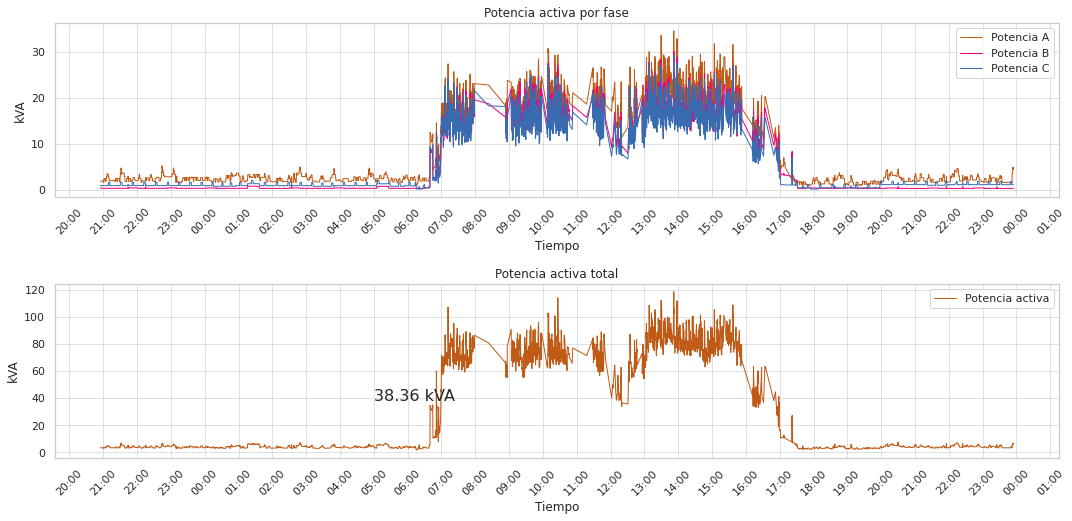

In [21]:
# Consumos medios por franjas
media_pico  = pico["Active_Power_Total"].mean()
media_valle = valle["Active_Power_Total"].mean()
media_resto = resto["Active_Power_Total"].mean()

fig, axes = plt.subplots(figsize=(18, 8), nrows=2)

# Consumo por fase
data_preproc = ind_df[['createdAt','Active_Power_A','Active_Power_B','Active_Power_C']]
sns.lineplot(x='createdAt', y='value', hue='variable', data=pd.melt(data_preproc, ['createdAt']), ax=axes[0])
axes[0].legend(labels=["Potencia A", "Potencia B", "Potencia C"], loc="upper right")

axes[0].set_title("Potencia activa por fase")
axes[0].set_xlabel("Tiempo")
axes[0].set_ylabel("kVA")
format_datetime_axis_ticks(axes[0])

# Consumo total
sns.lineplot(x=ind_df.createdAt, y=ind_df.Apparent_Power_Total, ax=axes[1])
media_resto_text = str(round(media_resto, 2)) + ' kVA'
axes[1].text(resto.createdAt.min(), media_resto, media_resto_text, fontsize=16)
axes[1].legend(labels=["Potencia activa", "Media en franja Resto"], loc="upper right")

axes[1].set_title("Potencia activa total")
axes[1].set_xlabel("Tiempo")
axes[1].set_ylabel("kVA")
format_datetime_axis_ticks(axes[1])

plt.subplots_adjust(hspace = 0.5)

In [23]:
print('Consumo medio en franja Pico: {} kVA'.format(round(media_pico, 2)))
print('Consumo medio en franja Valle: {} kVA'.format(round(media_valle, 2)))
print('Consumo medio en franja Resto: {} kVA'.format(round(media_resto, 2)))

Consumo medio en franja Pico: 3.77 kVA
Consumo medio en franja Valle: 4.03 kVA
Consumo medio en franja Resto: 38.36 kVA


## Factor de potencia (Cos $\phi$)

In [24]:
# Implementación del pseud-código del datasheet del instrumento para decodificar el FP

def decode_pf(x):
    if x > 1:
        return 2 - x, 'leading'
    elif x < -1:
        return -2 - x, 'leading'
    elif abs(x) == 1:
        return x, 'unity'
    else:
        return x, 'lagging'

In [25]:
# Creamos nuevas columnas en nuestro dataset para cargar los valores decodificados

ind_df[['Power_Factor_A_Fixed','Power_Factor_A_Position']] = ind_df['Power_Factor_A'].apply(decode_pf).apply(pd.Series)
ind_df[['Power_Factor_B_Fixed','Power_Factor_B_Position']] = ind_df['Power_Factor_B'].apply(decode_pf).apply(pd.Series)
ind_df[['Power_Factor_C_Fixed','Power_Factor_C_Position']] = ind_df['Power_Factor_C'].apply(decode_pf).apply(pd.Series)
ind_df[['Power_Factor_Total_Fixed','Power_Factor_Total_Position']] = ind_df['Power_Factor_Total'].apply(decode_pf).apply(pd.Series)

### Visualización del factor de potencia corregido separado por fase

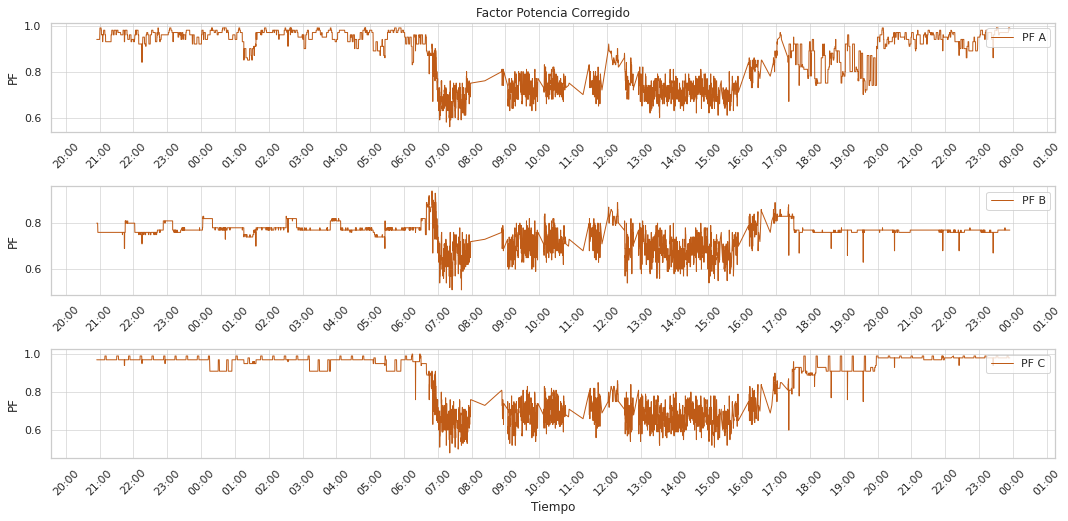

In [26]:
fig, axes = plt.subplots(figsize=(18, 8), nrows=3)
data_preproc = ind_df[['createdAt','Power_Factor_A_Fixed']]

sns.lineplot(x='createdAt', y='value', hue='variable', data=pd.melt(data_preproc, ['createdAt']), ax=axes[0])
axes[0].legend(labels=["PF A"], loc="upper right")

axes[0].set_title("Factor Potencia Corregido")
axes[0].set_xlabel("")
axes[0].set_ylabel("PF")
format_datetime_axis_ticks(axes[0])


data_preproc = ind_df[['createdAt','Power_Factor_B_Fixed']]

sns.lineplot(x='createdAt', y='value', hue='variable', data=pd.melt(data_preproc, ['createdAt']), ax=axes[1])
axes[1].legend(labels=["PF B"], loc="upper right")

axes[1].set_xlabel("")
axes[1].set_ylabel("PF")
format_datetime_axis_ticks(axes[1])


data_preproc = ind_df[['createdAt','Power_Factor_C_Fixed']]

sns.lineplot(x='createdAt', y='value', hue='variable', data=pd.melt(data_preproc, ['createdAt']), ax=axes[2])
axes[2].legend(labels=["PF C"], loc="upper right")

axes[2].set_xlabel("Tiempo")
axes[2].set_ylabel("PF")
format_datetime_axis_ticks(axes[2])

plt.subplots_adjust(hspace = 0.5)

### Visualización conjunta del factor de potencia corregido

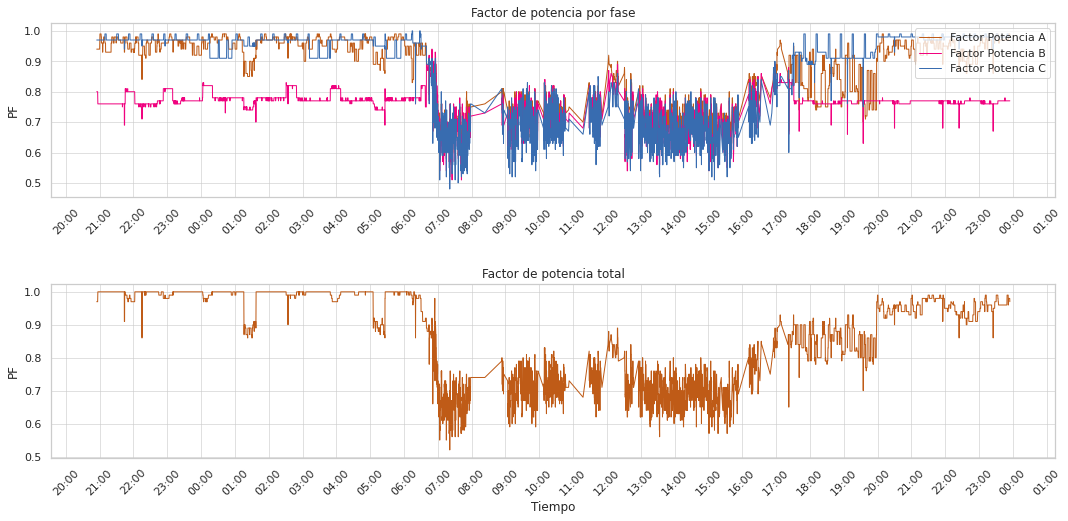

In [27]:
fig, axes = plt.subplots(figsize=(18, 8), nrows=2)
data_preproc = ind_df[['createdAt','Power_Factor_A_Fixed','Power_Factor_B_Fixed','Power_Factor_C_Fixed']]
sns.lineplot(x='createdAt', y='value', hue='variable', data=pd.melt(data_preproc, ['createdAt']), ax=axes[0])
axes[0].legend(labels=["Factor Potencia A", "Factor Potencia B", "Factor Potencia C"], loc="upper right")

axes[0].set_title("Factor de potencia por fase")
axes[0].set_xlabel("")
axes[0].set_ylabel("PF")
format_datetime_axis_ticks(axes[0])

sns.lineplot(x=ind_df.createdAt, y=ind_df.Power_Factor_Total_Fixed, ax=axes[1])

axes[1].set_title("Factor de potencia total")
axes[1].set_xlabel("Tiempo")
axes[1].set_ylabel("PF")
format_datetime_axis_ticks(axes[1])

plt.subplots_adjust(hspace = 0.5)

## Análisis de eficiencia

In [28]:
# Creamos nuevos dataframes con los valores del factor de potencia para cada fase

# Fase A
pfa_df = ind_df[["createdAt", "Power_Factor_A_Fixed","Power_Factor_A_Position"]].copy().reset_index(drop=True)
pfa_df.rename(columns = {"Power_Factor_A_Fixed":"PF_Value", "Power_Factor_A_Position":"Position"}, inplace = True)
pfa_df["Phase"] = 'A'

# Fase B
pfb_df = ind_df[["createdAt", "Power_Factor_B_Fixed","Power_Factor_B_Position"]].copy().reset_index(drop=True)
pfb_df.rename(columns = {"Power_Factor_B_Fixed":"PF_Value", "Power_Factor_B_Position":"Position"}, inplace = True)
pfb_df["Phase"] = 'B'

# Fase C
pfc_df = ind_df[["createdAt", "Power_Factor_C_Fixed","Power_Factor_C_Position"]].copy().reset_index(drop=True)
pfc_df.rename(columns = {"Power_Factor_C_Fixed":"PF_Value", "Power_Factor_C_Position":"Position"}, inplace = True)
pfc_df["Phase"] = 'C'

# Unimos los dataframes en uno solo
pf_df = pd.concat([pfa_df, pfb_df, pfc_df]).reset_index(drop=True)

# Agregamos una columna con un valor numérico para la posición
# Condiciones
conditions = [
    (pf_df["Position"] == 'lagging'),
    (pf_df["Position"] == 'unity'),
    (pf_df["Position"] == 'leading')
]

# Valores
values = [-1, 0, 1]

# Asignación de valores
pf_df['Position_Num'] = np.select(conditions, values)

pf_df.sample(10)

,createdAt,PF_Value,Position,Phase,Position_Num
10996,2020-11-04 10:39:39.940000+00:00,0.67,lagging,B,-1
7287,2020-11-03 21:27:28.931000+00:00,0.76,leading,B,1
3206,2020-11-04 07:14:57.253000+00:00,0.58,lagging,A,-1
769,2020-11-03 23:23:43.458000+00:00,0.97,lagging,A,-1
13554,2020-11-04 21:39:50.888000+00:00,0.77,lagging,B,-1
8182,2020-11-04 00:20:50.801000+00:00,0.78,leading,B,1
6597,2020-11-04 22:14:30.702000+00:00,0.97,lagging,A,-1
11694,2020-11-04 14:24:31.871000+00:00,0.63,lagging,B,-1
724,2020-11-03 23:15:04.110000+00:00,0.97,lagging,A,-1
343,2020-11-03 22:01:53.658000+00:00,0.94,lagging,A,-1


In [29]:
def plot_pct(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width()/3
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
            
    plt.show()

### Eficiencia por fase

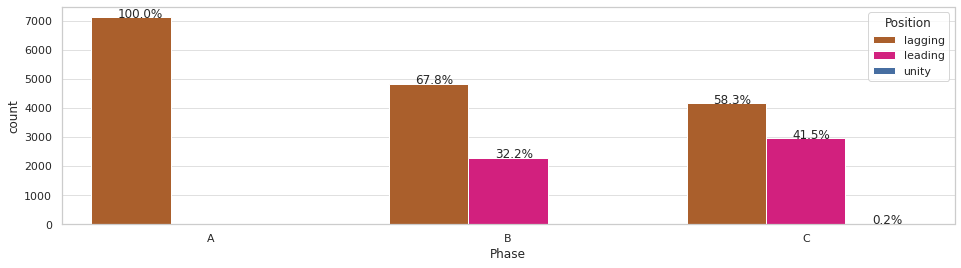

In [30]:
plt.figure(figsize=(16, 4))
ax = sns.countplot(x="Phase", hue="Position", data=pf_df)
plot_pct(ax, pf_df.Phase, 3, 3)

> Se dice que el factor de potencia está en **atraso (_lagging_)** cuando el ángulo de la corriente es menor que el ángulo de la tensión. Este caso se da para cargas **inductivas**, como son los reactores y los motores de inducción.  
> Cuando el ángulo de la corriente es mayor que el ángulo de la tensión el factor de potencia está en **adelanto (_leading_)**. Este caso se da cuando las cargas tienen una alta componente **capacitiva**, como son los bancos de capacitores, generadores operando en sobre excitación y capacitores sincrónicos.

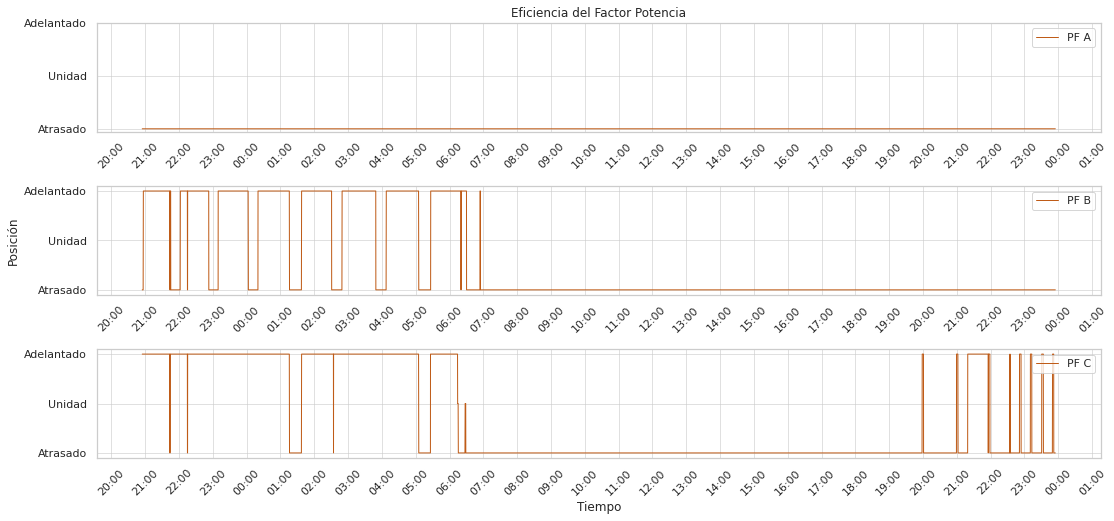

In [31]:
fig, axes = plt.subplots(figsize=(18, 8), nrows=3)
pos_ticks = [-1, 0, 1]
pos_labels = ['Atrasado', 'Unidad', 'Adelantado']

data_preproc = pf_df[pf_df["Phase"] == 'A'][["createdAt","Position_Num"]]

sns.lineplot(x='createdAt', y='value', hue='variable', data=pd.melt(data_preproc, ['createdAt']), ax=axes[0])
axes[0].legend(labels=["PF A"], loc="upper right")

axes[0].set_title("Eficiencia del Factor Potencia")
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_yticks(pos_ticks)
axes[0].set_yticklabels(pos_labels)
format_datetime_axis_ticks(axes[0])


data_preproc = pf_df[pf_df["Phase"] == 'B'][["createdAt","Position_Num"]]

sns.lineplot(x='createdAt', y='value', hue='variable', data=pd.melt(data_preproc, ['createdAt']), ax=axes[1])
axes[1].legend(labels=["PF B"], loc="upper right")

axes[1].set_xlabel("")
axes[1].set_ylabel("Posición")
axes[1].set_yticks(pos_ticks)
axes[1].set_yticklabels(pos_labels)
format_datetime_axis_ticks(axes[1])


data_preproc = pf_df[pf_df["Phase"] == 'C'][["createdAt","Position_Num"]]

sns.lineplot(x='createdAt', y='value', hue='variable', data=pd.melt(data_preproc, ['createdAt']), ax=axes[2])
axes[2].legend(labels=["PF C"], loc="upper right")

axes[2].set_xlabel("Tiempo")
axes[2].set_ylabel("")
axes[2].set_yticks(pos_ticks)
axes[2].set_yticklabels(pos_labels)
format_datetime_axis_ticks(axes[2])

plt.subplots_adjust(hspace = 0.5)

# Análisis de cortes en la medición

Tomamos una muestra dentro de un rango horario donde entendemos que hay registros

In [32]:
mask = (ind_df["createdAt"] > '2020-11-04 06:30') & (ind_df["createdAt"] < '2020-11-04 06:33')
ind_df["createdAt"].loc[mask]

2020   2020-11-04 06:30:03.551000+00:00
2021   2020-11-04 06:30:13.916000+00:00
2022   2020-11-04 06:30:26.304000+00:00
2023   2020-11-04 06:30:36.682000+00:00
2024   2020-11-04 06:30:49.033000+00:00
2025   2020-11-04 06:31:03.288000+00:00
2026   2020-11-04 06:31:11.789000+00:00
2027   2020-11-04 06:31:24.123000+00:00
2028   2020-11-04 06:31:34.532000+00:00
2029   2020-11-04 06:31:47.714000+00:00
2030   2020-11-04 06:31:55.420000+00:00
2031   2020-11-04 06:32:05.825000+00:00
2032   2020-11-04 06:32:16.194000+00:00
2033   2020-11-04 06:32:28.613000+00:00
2034   2020-11-04 06:32:43.059000+00:00
2035   2020-11-04 06:32:53.764000+00:00
Name: createdAt, dtype: datetime64[ns, UTC]

> Deducimos que el sensor toma 5 muestras por minuto

**¿Qué ocurre donde hay baches?**

In [33]:
mask = (ind_df["createdAt"] > '2020-11-04 08:00') & (ind_df["createdAt"] < '2020-11-04 08:03')
ind_df["createdAt"].loc[mask]

Series([], Name: createdAt, dtype: datetime64[ns, UTC])

> Efectivamente no encontramos registros en el dataframe donde se perciben esos baches.

**¿Cuántos baches hay en las mediciones y cuánto duran?**

In [34]:
# Tomamos las diferencias entre cada registro de fecha/hora (ignoramos la primera fila porque no va a tener referencia previa)
deltas = ind_df["createdAt"].diff()[1:]
gap = 1

# Filtramos las diferencias
gaps = deltas[deltas > timedelta(minutes=gap)]

# Imprimimos resultados
print('{} baches mayores a {} minutos'.format(len(gaps), gap))
print('Duración promedio: {} \n'.format(gaps.mean()))
for i, g in gaps.iteritems():
    gap_start = ind_df["createdAt"][i - 1]
    print(f'Inicio: {datetime.strftime(gap_start, "%Y-%m-%d %H:%M:%S")} | '
          f'Duración: {str(g.to_pytimedelta())}')

34 baches mayores a 1 minutos
Duración promedio: 0 days 00:06:45.706500 

Inicio: 2020-11-04 07:58:47 | Duración: 0:24:33.404000
Inicio: 2020-11-04 08:23:21 | Duración: 0:30:00.612000
Inicio: 2020-11-04 08:56:59 | Duración: 0:06:44.020000
Inicio: 2020-11-04 09:57:41 | Duración: 0:09:46.205000
Inicio: 2020-11-04 10:44:01 | Duración: 0:01:10.218000
Inicio: 2020-11-04 10:47:07 | Duración: 0:04:41.462000
Inicio: 2020-11-04 10:51:49 | Duración: 0:01:03.744000
Inicio: 2020-11-04 10:52:53 | Duración: 0:24:41.597000
Inicio: 2020-11-04 11:17:34 | Duración: 0:10:49.191000
Inicio: 2020-11-04 11:48:47 | Duración: 0:02:19.187000
Inicio: 2020-11-04 11:51:06 | Duración: 0:10:52.899000
Inicio: 2020-11-04 12:01:59 | Duración: 0:01:07.019000
Inicio: 2020-11-04 12:04:07 | Duración: 0:03:02.276000
Inicio: 2020-11-04 12:07:33 | Duración: 0:01:45.983000
Inicio: 2020-11-04 12:13:06 | Duración: 0:01:46.627000
Inicio: 2020-11-04 12:20:42 | Duración: 0:10:00.085000
Inicio: 2020-11-04 12:39:33 | Duración: 0:02:0

> ¿Correspondería hacer un tratamiento de estas franjas horarias?

# Temperatura

In [35]:
ind_df["Temperature"].describe()

count    7119.000000
mean       45.533899
std         2.541111
min        39.720000
25%        43.400000
50%        45.540000
75%        47.380000
max        50.760000
Name: Temperature, dtype: float64

In [36]:
temp = ind_df[["createdAt", "Temperature"]].copy()
  
# Calculamos un promedio móvil de 150 observaciones para suavizar las curvas(cada 30 min aprox)
temp['SMA30'] = temp['Temperature'].rolling(150).mean()

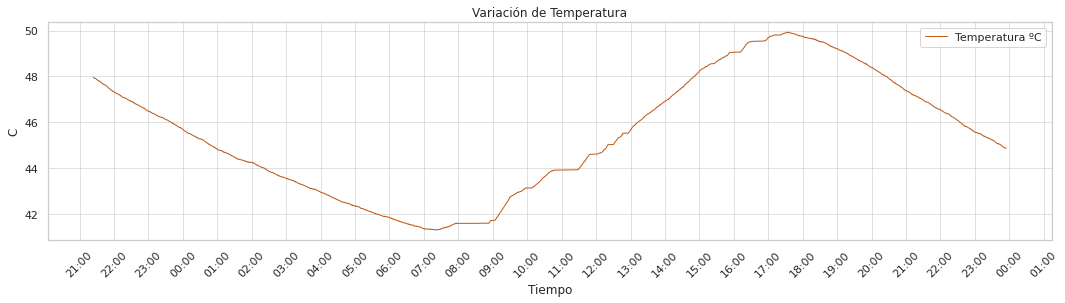

In [37]:
fig, ax = plt.subplots(figsize=(18, 4))
chart = sns.lineplot(x=temp.createdAt, y=temp.SMA30, ax=ax)
plt.legend(labels=["Temperatura ºC"], loc="upper right")
format_datetime_axis_ticks(ax)

plt.title('Variación de Temperatura')
plt.xlabel('Tiempo')
plt.ylabel('C')
plt.xticks(rotation=45)
plt.show()

#Potencias

In [47]:
df_concientizar = ind_df.copy()
# Convertimos la variable a una fecha/hora
df_concientizar["createdAt"] = pd.to_datetime(df_concientizar.createdAt)

# Ordenamos el dataframe por fecha/hora
df_concientizar = df_concientizar.sort_values("createdAt")

Se analizan las formas de onda de las tres potencias (Activa, Aparente y Reactiva) totales durante el periodo de mayor consumo.

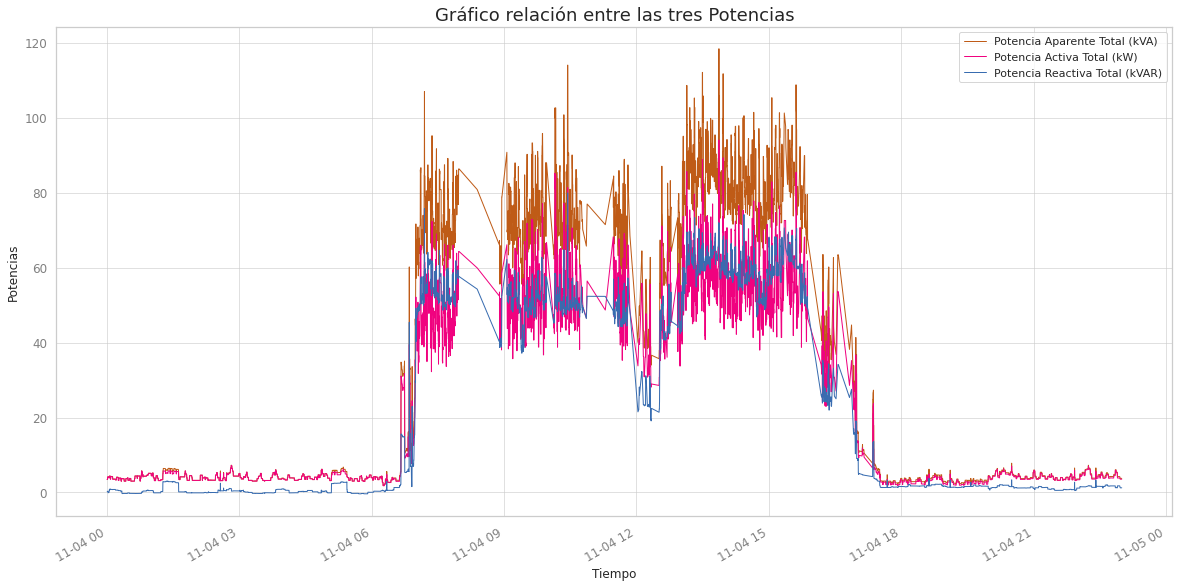

In [48]:
mask = (df_concientizar["createdAt"] > '2020-11-04 00:00') & (df_concientizar["createdAt"] < '2020-11-04 23:00')

df_conc_filt = df_concientizar[['createdAt','Apparent_Power_Total','Active_Power_Total','Reactive_Power_Total']].loc[mask]
df_conc_filt.plot(x='createdAt', figsize=(20, 10))

plt.title("Gráfico relación entre las tres Potencias", fontsize=18)
plt.xlabel("Tiempo")
plt.ylabel("Potencias")
plt.legend(labels=["Potencia Aparente Total (kVA)", "Potencia Activa Total (kW)", "Potencia Reactiva Total (kVAR)"], loc="upper right")


ax = plt.gca()
ax.tick_params(axis='both', colors='gray', labelsize=12)

In [49]:
df_conc_filt['Apparent_Power_Total'].describe()

count    5879.000000
mean       27.702346
std        34.077456
min         1.850000
25%         3.620000
50%         4.650000
75%        67.365000
max       118.410000
Name: Apparent_Power_Total, dtype: float64

In [50]:
df_conc_filt['Active_Power_Total'].describe()

count    5879.000000
mean       20.201577
std        23.724000
min         1.780000
25%         3.470000
50%         4.490000
75%        45.140000
max        94.070000
Name: Active_Power_Total, dtype: float64

In [51]:
df_conc_filt['Reactive_Power_Total'].describe()

count    5879.000000
mean       18.231150
std        25.007908
min        -0.370000
25%         0.510000
50%         1.630000
75%        48.935000
max        79.920000
Name: Reactive_Power_Total, dtype: float64

Gráfico de las tres potencias Totales en función de la Temperatura

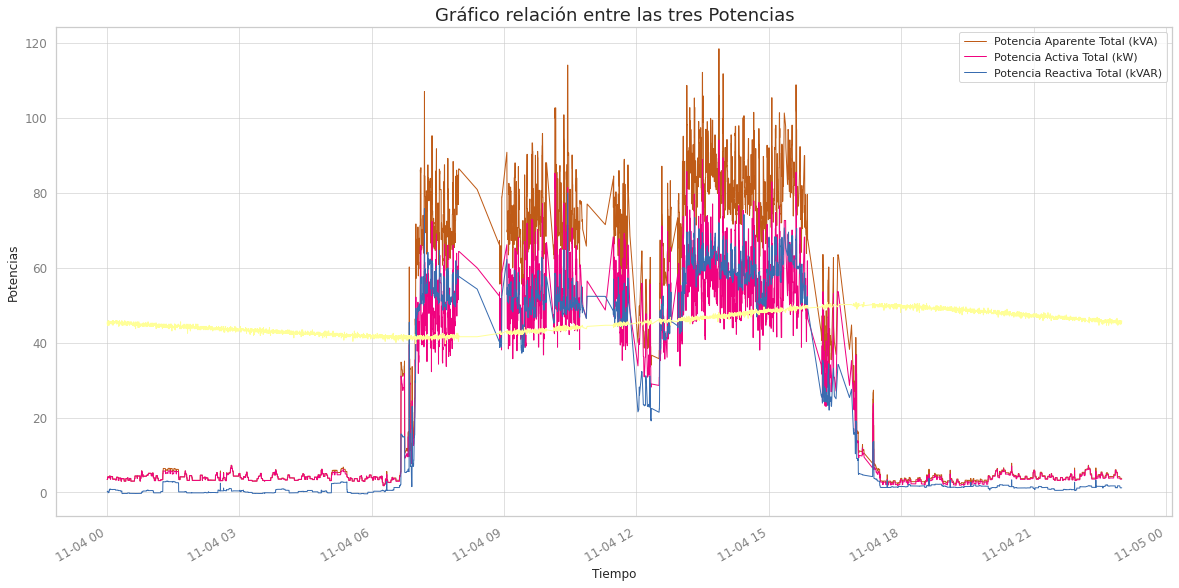

In [63]:
mask = (df_concientizar["createdAt"] > '2020-11-04 00:00') & (df_concientizar["createdAt"] < '2020-11-04 23:00')

df_conc_filt = df_concientizar[['createdAt','Apparent_Power_Total','Active_Power_Total','Reactive_Power_Total','Temperature']].loc[mask]
df_conc_filt.plot(x='createdAt', figsize=(20, 10))

plt.title("Gráfico relación entre las tres Potencias", fontsize=18)
plt.xlabel("Tiempo")
plt.ylabel("Potencias")
plt.legend(labels=["Potencia Aparente Total (kVA)", "Potencia Activa Total (kW)", "Potencia Reactiva Total (kVAR)"], loc="upper right")


ax = plt.gca()
ax.tick_params(axis='both', colors='gray', labelsize=12)

Gráfico de las potencias totales consumidas en un día, con el fin de observar en que horarios se supera la Demanda Autorizada.

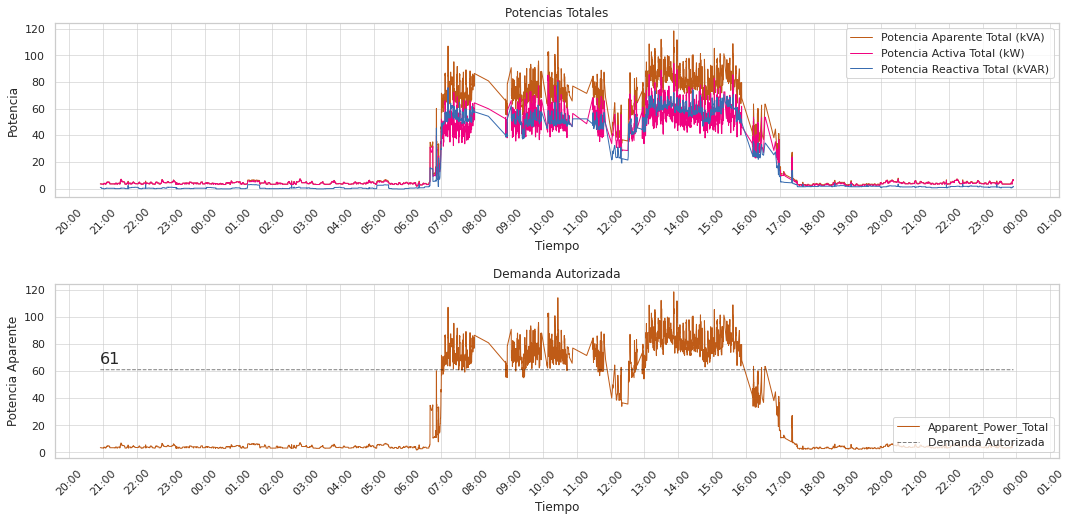

In [64]:
fig, axes = plt.subplots(figsize=(18, 8), nrows=2)
df_conc_filt = df_concientizar[['createdAt','Apparent_Power_Total','Active_Power_Total','Reactive_Power_Total']]

sns.lineplot(x='createdAt', y='value', hue='variable', data=pd.melt(df_conc_filt, ['createdAt']), ax=axes[0])
axes[0].legend(labels=["Potencia Aparente Total (kVA)", "Potencia Activa Total (kW)", "Potencia Reactiva Total (kVAR)"], loc="upper right")

axes[0].set_title("Potencias Totales")
axes[0].set_xlabel("Tiempo")
axes[0].set_ylabel("Potencia")
format_datetime_axis_ticks(axes[0])

sns.lineplot(x=df_conc_filt.createdAt, y=df_conc_filt.Apparent_Power_Total, ax=axes[1])
sns.lineplot(x=df_conc_filt.createdAt, y=61, data=df_conc_filt, linestyle='dashed',linewidth=1,color='black', alpha=0.5, ax=axes[1])
axes[1].text(df_conc_filt.createdAt.min(), 65, '61', fontsize=16)
axes[1].legend(labels=["Apparent_Power_Total", "Demanda Autorizada"], loc="lower right")

axes[1].set_title("Demanda Autorizada")
axes[1].set_xlabel("Tiempo")
axes[1].set_ylabel("Potencia Aparente")
format_datetime_axis_ticks(axes[1])

plt.subplots_adjust(hspace = 0.5)

#Análisis de pérdida de datos

Se grafican las potencias aparente, reactiva y activa entregadas de un día completo. Se observa que la "Energía Aparente Entregada", es la que presenta mayor incremento. Por lo tanto se utiliza esta para el análisis de la perdida de información.

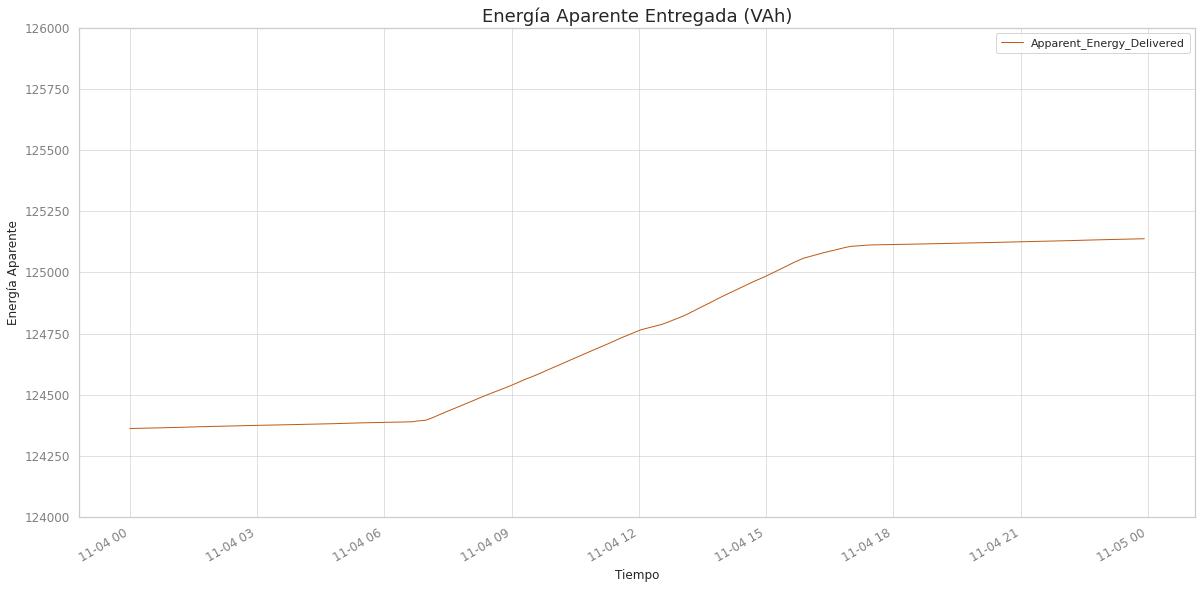

In [57]:
mask3 = (df_concientizar["createdAt"] > '2020-11-04 00:00') & (df_concientizar["createdAt"] < '2020-11-04 23:59')

df_power_delivered = df_concientizar[['createdAt', 'Apparent_Energy_Delivered', 'Reactive_Energy_Delivered', 'Active_Energy_Delivered']].loc[mask3].copy()

# Graficamos la Energía Aparente entregada por el proveedor
df_power_delivered.plot(x ='createdAt', y = 'Apparent_Energy_Delivered', figsize=(20, 10))
plt.title("Energía Aparente Entregada (VAh)", fontsize=18)
plt.ylim(124000,126000)

plt.xlabel("Tiempo")
plt.ylabel("Energía Aparente")

ax = plt.gca()
ax.tick_params(axis='both', colors='gray', labelsize=12)

Text(0, 0.5, 'Energía Reactiva')

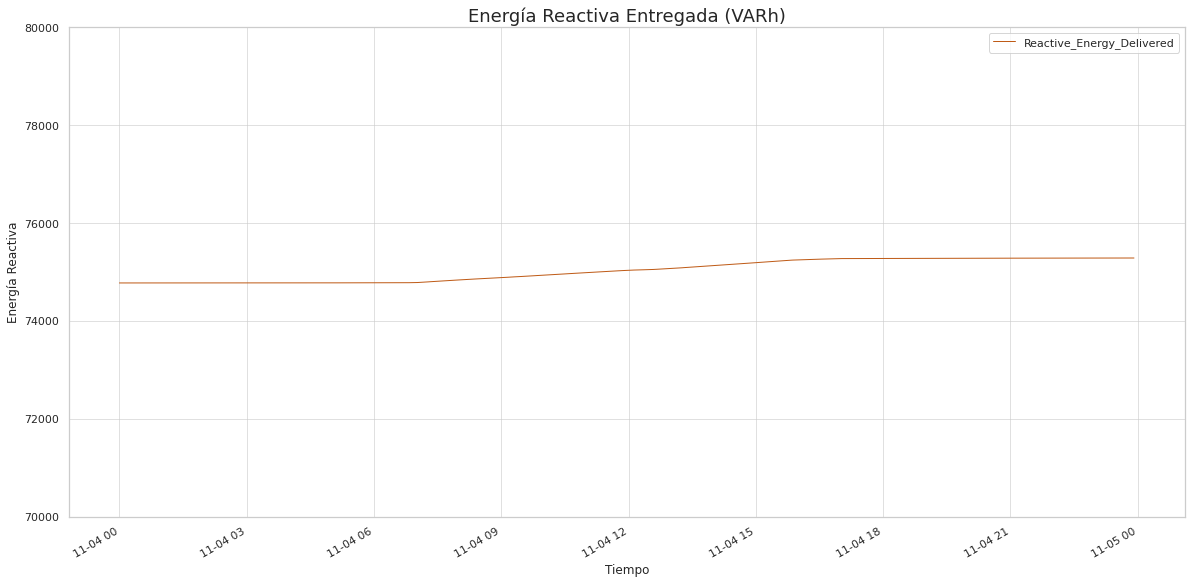

In [58]:
# Graficamos la Energía Reactiva entregada por el proveedor
df_power_delivered.plot(x ='createdAt', y = 'Reactive_Energy_Delivered', figsize=(20, 10))
plt.title("Energía Reactiva Entregada (VARh)", fontsize=18)
plt.ylim(70000,80000)

plt.xlabel("Tiempo")
plt.ylabel("Energía Reactiva")

Text(0, 0.5, 'Energía Activa')

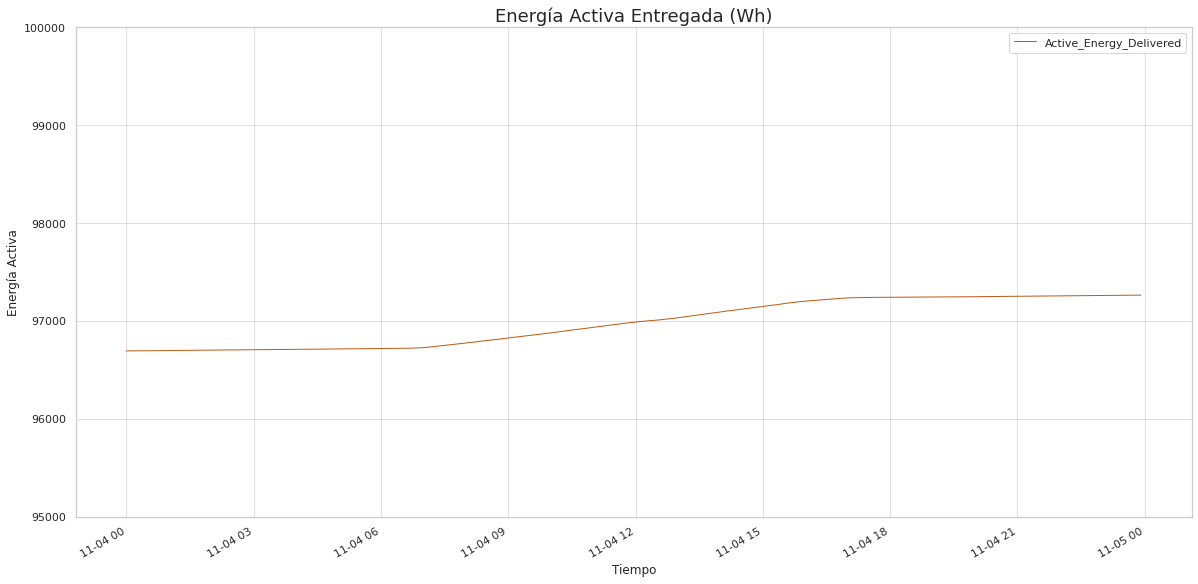

In [59]:
# Graficamos la Energía Activa entregada por el proveedor
df_power_delivered.plot(x ='createdAt', y = 'Active_Energy_Delivered', figsize=(20, 10))
plt.title("Energía Activa Entregada (Wh)", fontsize=18)
plt.ylim(95000,100000)

plt.xlabel("Tiempo")
plt.ylabel("Energía Activa")

Se analiza la Energía Aparente Entregada minutos antes y después de la perdida de datos observada en el dataframe.
Se observa que el último dato se registra a la 7:58:47, luego se recibe un dato a las 8:23:21 y al parecer se reanuda la comunicación a las 8:53:21.
De dicho analisis se saca como conclusión que la Energía Aparente Entregada, es acumulativa en el tiempo, debido a que incrementa 1Wh por minuto.

In [60]:
mask1 = (df_concientizar["createdAt"] > '2020-11-04 07:55') & (df_concientizar["createdAt"] < '2020-11-04 8:00')
mask2 = (df_concientizar["createdAt"] > '2020-11-04 08:00') & (df_concientizar["createdAt"] < '2020-11-04 9:00')

df_conc_before = df_concientizar[['createdAt','Apparent_Energy_Received', 'Apparent_Energy_Delivered']].loc[mask1].copy()
df_conc_after = df_concientizar[['createdAt','Apparent_Energy_Received', 'Apparent_Energy_Delivered']].loc[mask2].copy()


#rd=data_preproc.sample(10,random_state=123)
print(df_conc_before)
print(df_conc_after)

                            createdAt  Apparent_Energy_Received  \
2455 2020-11-04 07:55:11.825000+00:00                    906.87   
2456 2020-11-04 07:55:24.372000+00:00                    906.87   
2457 2020-11-04 07:55:34.793000+00:00                    906.87   
2458 2020-11-04 07:55:47.081000+00:00                    906.87   
2459 2020-11-04 07:55:59.482000+00:00                    906.87   
2460 2020-11-04 07:56:12.380000+00:00                    906.87   
2461 2020-11-04 07:56:22.503000+00:00                    906.87   
2462 2020-11-04 07:56:32.557000+00:00                    906.87   
2463 2020-11-04 07:56:42.937000+00:00                    906.87   
2464 2020-11-04 07:56:57.956000+00:00                    906.87   
2465 2020-11-04 07:57:11.588000+00:00                    906.87   
2466 2020-11-04 07:57:26.571000+00:00                    906.87   
2467 2020-11-04 07:57:41.068000+00:00                    906.87   
2468 2020-11-04 07:57:53.452000+00:00                    906.8

Analizando las consultas anteriores, se observa que la energía aparente antes del corte (7:58:47), es de 124467.43 Wh y el próximo dato válido a las 8:53:21 es de 124534.95 Wh. Con lo cual en el lapso de perdida de datos que dura 55 minutos la energia aparente entregada incremento.

In [61]:
mask1 = (df_concientizar["createdAt"] > '2020-11-04 07:58:30') & (df_concientizar["createdAt"] < '2020-11-04 8:00')
mask2 = (df_concientizar["createdAt"] > '2020-11-04 08:50:00') & (df_concientizar["createdAt"] < '2020-11-04 8:54')

df_before = df_concientizar["Apparent_Energy_Delivered"].loc[mask1]
df_after = df_concientizar["Apparent_Energy_Delivered"].loc[mask2]

print("La energía durante el período de no recepción de datos incremento:", (df_after.iloc[0]-df_before.iloc[-1]).round(2), "Wh")

La energía durante el período de no recepción de datos incremento: 63.71 Wh


Con este ultimo dato podemos concluir que la perdida de datos se debe a una perdida de comunicación y no a un corte de suministro de energía.

# Conclusiones

### Observaciones
* Teniendo en cuenta la teoría de las leyes de Ohm y Watt, gran parte de las columnas del dataset estarán relacionadas mediante estas dos ecuaciones:
  * $V = I R$
  * $P = I V$
* Consumo medio por franja es: 
  * Pico: 4.01 kVA
  * Valle: 4.1 kVA
  * Resto: 53.98 kVA
* Hay 34 baches/cortes en las mediciones que son mayores a 1 minuto. La duración promedio de los mismos es de 00:06:45. Habría que pensar un método de tratamiento para cubrir valores faltantes.
* La temperatura sigue un patrón lógico por la hora del día, con un mínimo de 39.72º C alrededor de las 7:30 y un máximo de 50.76º C alrededor de las 17:30. No he estudiado si existe relación con otras variables. 

### Preguntas y próximos pasos
* Debemos profundizar el conocimiento en el análisis de series temporales. Aún no tratamos el tema en la diplomatura.
* Quisiera tener más perspectiva de negocio para poder orientar la investigación de los datos.
  * ¿Qué persigue el interesado?
  * ¿Hay alguna variable que sea de particular interés y podamos considerarla "target"?
* ¿Se pueden conseguir los valores de una factura de EPEC para el cliente en cuestión así analizamos los datos con referencia a los consumos autorizados?
* Los 15 minutos dentro de los cuales la prestataria mide si hay excesos, ¿comienzan a medirse a partir de que se supera un umbral o es a intervalos fijos?